In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
"""import pandas as pd
file = open('Apache_2k.log')
lines = file.readlines()

del df
for line in lines:
    columns = line[:-1].split(' ')
    columns[6] = ' '.join(columns[6:]).split(" ", 1)
    Temp = pd.DataFrame({"Date & Time": [str(",".join(columns[:5]))], "Type of Message":[str(columns[5])], 'Function': [str(columns[6][0])] ,'Message': [str(columns[6][1])]}) 
    try:
        df   
    except NameError:
        df = Temp
    else:
        df = df.append(Temp, ignore_index='True')"""

'import pandas as pd\nfile = open(\'Apache_2k.log\')\nlines = file.readlines()\n\ndel df\nfor line in lines:\n    columns = line[:-1].split(\' \')\n    columns[6] = \' \'.join(columns[6:]).split(" ", 1)\n    Temp = pd.DataFrame({"Date & Time": [str(",".join(columns[:5]))], "Type of Message":[str(columns[5])], \'Function\': [str(columns[6][0])] ,\'Message\': [str(columns[6][1])]}) \n    try:\n        df   \n    except NameError:\n        df = Temp\n    else:\n        df = df.append(Temp, ignore_index=\'True\')'

## Import data

In [ ]:
with open('Apache_2k.log') as file:
    lines = file.readlines()

    with open('log.xlsx', 'w+') as csvfile:
        w = csv.writer(csvfile)
        w.writerows(lines)

In [80]:
df = pd.read_excel('log.xlsx',index_col=0, parse_dates=True)

In [40]:
df.head()

TYPE            SOURCE  \
DATE                                            
2005-12-04 04:47:44  notice  workerEnv.init()   
2005-12-04 04:47:44  error             mod_jk   
2005-12-04 04:51:08  notice        jk2_init()   
2005-12-04 04:51:09  notice        jk2_init()   
2005-12-04 04:51:09  notice        jk2_init()   

                                                    MESSAGE  
DATE                                                         
2005-12-04 04:47:44  ok /etc/httpd/conf/workers2.properties  
2005-12-04 04:47:44        child workerEnv in error state 6  
2005-12-04 04:51:08  Found child 6725 in scoreboard slot 10  
2005-12-04 04:51:09   Found child 6726 in scoreboard slot 8  
2005-12-04 04:51:09   Found child 6728 in scoreboard slot 6

In [41]:
df.describe()

TYPE      SOURCE                                 MESSAGE
count     2000        2000                                    2000
unique       2           4                                     886
top     notice  jk2_init()  ok /etc/httpd/conf/workers2.properties
freq      1405         848                                     569

## Count and plot log events by hour

In [58]:
count_by_hour = df.resample('H').count()['MESSAGE']
count_by_hour

DATE
2005-12-04 04:00:00     85
2005-12-04 05:00:00     50
2005-12-04 06:00:00    340
2005-12-04 07:00:00    105
2005-12-04 08:00:00      1
2005-12-04 09:00:00      1
2005-12-04 10:00:00      1
2005-12-04 11:00:00      3
2005-12-04 12:00:00      1
2005-12-04 13:00:00      1
2005-12-04 14:00:00      1
2005-12-04 15:00:00      2
2005-12-04 16:00:00     89
2005-12-04 17:00:00    125
2005-12-04 18:00:00      1
2005-12-04 19:00:00     86
2005-12-04 20:00:00    159
2005-12-04 21:00:00      0
2005-12-04 22:00:00      0
2005-12-04 23:00:00      0
2005-12-05 00:00:00      0
2005-12-05 01:00:00      2
2005-12-05 02:00:00      0
2005-12-05 03:00:00     73
2005-12-05 04:00:00     54
2005-12-05 05:00:00     30
2005-12-05 06:00:00      7
2005-12-05 07:00:00    148
2005-12-05 08:00:00      0
2005-12-05 09:00:00     10
2005-12-05 10:00:00    153
2005-12-05 11:00:00     24
2005-12-05 12:00:00     29
2005-12-05 13:00:00    180
2005-12-05 14:00:00     13
2005-12-05 15:00:00     37
2005-12-05 16:00:00    

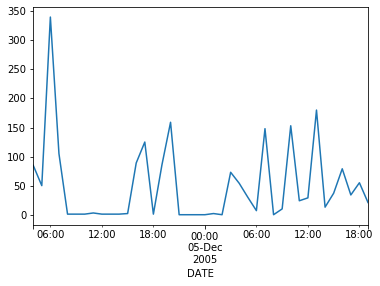

In [59]:
count_by_hour.plot()

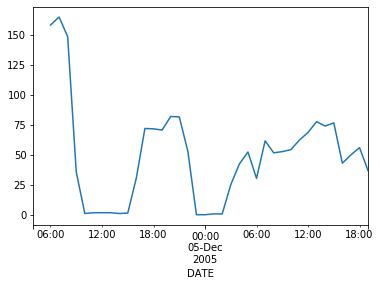

In [62]:
count_by_hour.rolling(window=3).mean().plot()

## Log type and function values

In [55]:
df['TYPE'].value_counts()

notice    1405
error      595
Name: TYPE, dtype: int64

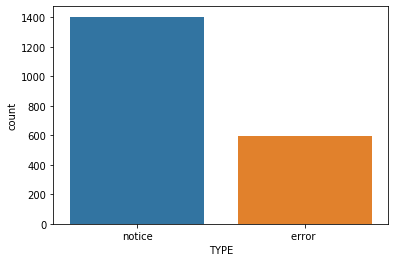

In [68]:
ax = sns.countplot(x="TYPE",data=df)

In [56]:
df['SOURCE'].value_counts()

jk2_init()          848
workerEnv.init()    569
mod_jk              551
[client              32
Name: SOURCE, dtype: int64

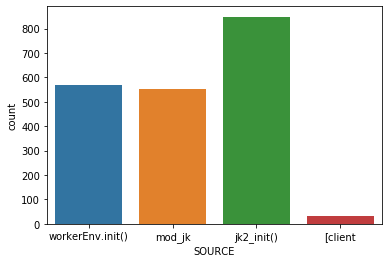

In [69]:
ax = sns.countplot(x="SOURCE",data=df)

##

In [83]:
df[df['TYPE'] == 'error'].resample('D').count()['MESSAGE']

DATE
2005-12-04    311
2005-12-05    284
Freq: D, Name: MESSAGE, dtype: int64

In [79]:
df['TYPE'].values

array(['notice', 'error ', 'notice', ..., 'notice', 'notice', 'error '],
      dtype=object)